# Mineração de Regras de Associação

### Importação das Bibliotecas:

In [78]:
import pandas as pd
import numpy as np
from apyori import apriori
import seaborn as sns
import matplotlib.pyplot as plt

### Importação dos Datasets:

In [ ]:
df = pd.read_csv('../../data/dataset_new_with_outliers.csv')
df

--------------------------------------------

### Formatação dos Dados:

* Definindo Regras de Formatação:

% == 0 = 0, % > 0 = 1;

CI < 3 = 0, CI >= 3 = 1;

IGC < 3 = 0, IGC >= 3 = 1;

variacao mat <= 0 = 0, variacao mat > 0 = 1;

% FIES == 0 = 0, % FIES > 0 = 1;

CURSOS == 0 = 0, CURSOS > 0 = 1;

saldo <= 0 = 0, saldo > 0 = 1;

* Formatando dataset:

In [ ]:
df_formated = df[['Natureza', 'Situacao', '%', 'CI N', 'CI V', 'IGC_N', 'IGC_M', 'IGC_V', 'EAD_17', 'variacao mat', '% FIES', 'CURSOS', 'saldo 2017']]

df_formated["%"] = np.where(df_formated["%"] == 0, '5AnosSemAR-Não', '5AnosSemAR-Sim')

df_formated["CI N"] = np.where(df_formated["CI N"] < 3, 'CI_N-Insuficiente', 'CI_N-Suficiente')
df_formated["CI V"] = np.where(df_formated["CI V"] < 3, 'CI_V-Insuficiente', 'CI_V-Suficiente')

df_formated["IGC_N"] = np.where(df_formated["IGC_N"] < 3, 'IGC_N-Insuficiente', 'IGC_N-Suficiente')
df_formated["IGC_M"] = np.where(df_formated["IGC_M"] < 3, 'IGC_M-Insuficiente', 'IGC_M-Suficiente')
df_formated["IGC_V"] = np.where(df_formated["IGC_V"] < 3, 'IGC_V-Insuficiente', 'IGC_V-Suficiente')

df_formated["variacao mat"] = np.where(df_formated["variacao mat"] <= 0, 'Matriculas-Diminuiu', 'Matriculas-Aumentou')
df_formated["% FIES"] = np.where(df_formated["% FIES"] == 0, 'Matriculas_FIES-Não', 'Matriculas_FIES-Sim')
df_formated["CURSOS"] = np.where(df_formated["CURSOS"] == 0, 'Ofereceu_Cursos-Não', 'Ofereceu_Cursos-Sim')
df_formated["saldo 2017"] = np.where(df_formated["saldo 2017"] <= 0, 'Saldo_2017-Não', 'Saldo_2017-Sim')

df_formated["Natureza"] = np.where(df_formated["Natureza"] == 0, 'Fins_Lucrativos-Não', 'Fins_Lucrativos-Sim')
df_formated["Situacao"] = np.where(df_formated["Situacao"] == 0, 'Situação-Extinta', 'Situação-Ativa')
df_formated["EAD_17"] = np.where(df_formated["EAD_17"] == 0, 'Ofereceu_EAD_17-Não', 'Ofereceu_EAD_17-Sim')

df_formated = df_formated.drop(columns={'CI N', 'CI V', 'CURSOS'})
df_formated

* Transformando em transações:

In [71]:
transactions = []
for i in range(len(df_formated)):
    transactions.append([df_formated.values[i,j] for j in range(df_formated.shape[1])])

transactions

[['Fins_Lucrativos-Sim',
  'Situação-Ativa',
  '5AnosSemAR-Sim',
  'IGC_N-Insuficiente',
  'IGC_M-Insuficiente',
  'IGC_V-Insuficiente',
  'Ofereceu_EAD_17-Não',
  'Matriculas-Diminuiu',
  'Matriculas_FIES-Não',
  'Saldo_2017-Não'],
 ['Fins_Lucrativos-Sim',
  'Situação-Ativa',
  '5AnosSemAR-Sim',
  'IGC_N-Insuficiente',
  'IGC_M-Insuficiente',
  'IGC_V-Insuficiente',
  'Ofereceu_EAD_17-Sim',
  'Matriculas-Diminuiu',
  'Matriculas_FIES-Não',
  'Saldo_2017-Sim'],
 ['Fins_Lucrativos-Não',
  'Situação-Ativa',
  '5AnosSemAR-Sim',
  'IGC_N-Insuficiente',
  'IGC_M-Insuficiente',
  'IGC_V-Insuficiente',
  'Ofereceu_EAD_17-Não',
  'Matriculas-Diminuiu',
  'Matriculas_FIES-Não',
  'Saldo_2017-Não'],
 ['Fins_Lucrativos-Não',
  'Situação-Ativa',
  '5AnosSemAR-Sim',
  'IGC_N-Insuficiente',
  'IGC_M-Insuficiente',
  'IGC_V-Insuficiente',
  'Ofereceu_EAD_17-Sim',
  'Matriculas-Diminuiu',
  'Matriculas_FIES-Não',
  'Saldo_2017-Sim'],
 ['Fins_Lucrativos-Sim',
  'Situação-Ativa',
  '5AnosSemAR-Sim',
  '

-----------------------------------------

### Algoritmo Apriori:

In [72]:
rules = apriori(transactions, min_support=0.001, min_confidence=0.8, min_lift=2)
results = list(rules)
len(results)

6550

In [73]:
A = []
B = []
support = []
confidence = []
lift = []

for result in results:
    s = result[1]
    result_rules = result[2]
    for result_rule in result_rules:
        a = list(result_rule[0])
        b = list(result_rule[1])
        c = result_rule[2]
        l = result_rule[3]

        A.append(a)
        B.append(b)
        support.append(s)
        confidence.append(c)
        lift.append(l)

In [ ]:
df_rules = pd.DataFrame({'Rule': A, 'Implication': B, 'Support': support, 'Confidence': confidence, 'Lift': lift})
df_rules['Rule'] = df_rules['Rule'].astype('string')
df_rules['Implication'] = df_rules['Implication'].astype('string')
df_rules.to_csv('../../data/rules_association_teste.csv', index=False)
df_rules

------------------------------

### Avaliando Regras de Associação:

In [ ]:
df_rules = pd.read_csv('../../data/rules_association_teste.csv')
pd.set_option('display.max_rows', None)
df_rules.head(None)
df_rules

In [77]:
df_rules.sort_values(by='Confidence', ascending=False).loc[df_rules['Implication'].str.contains('Situação-Ativa')==True].to_csv('../../data/association_rules_Ativa.csv', index=False)
df_rules.sort_values(by='Confidence', ascending=False).loc[df_rules['Implication'].str.contains('Situação-Extinta')==True].to_csv('../../data/association_rules_Extinta.csv', index=False)

In [93]:
df_rules['Type'] = ''

df_rules['Type'].loc[(df_rules['Implication'].str.contains('Situação-Ativa')==False) & (df_rules['Implication'].str.contains('Situação-Extinta')==False)] = 'Global'
df_rules['Type'].loc[df_rules['Implication'].str.contains('Situação-Ativa')==True] = 'Ativa'
df_rules['Type'].loc[df_rules['Implication'].str.contains('Situação-Extinta')==True] = 'Extinta'

C:\Users\Daniel\AppData\Local\Temp\ipykernel_18300\277081060.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rules['Type'].loc[(df_rules['Implication'].str.contains('Situação-Ativa')==False) & (df_rules['Implication'].str.contains('Situação-Extinta')==False)] = 'Global'
C:\Users\Daniel\AppData\Local\Temp\ipykernel_18300\277081060.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rules['Type'].loc[df_rules['Implication'].str.contains('Situação-Ativa')==True] = 'Ativa'
C:\Users\Daniel\AppData\Local\Temp\ipykernel_18300\277081060.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [103]:
df_rules.head()

,Rule,Implication,Support,Confidence,Lift,Type
0,['IGC_M-Suficiente'],['IGC_N-Suficiente'],0.053744,0.906977,13.431894,Global
1,['IGC_M-Suficiente'],['IGC_V-Suficiente'],0.049150,0.829457,14.680721,Global
2,['IGC_V-Suficiente'],['IGC_M-Suficiente'],0.049150,0.869919,14.680721,Global
3,['IGC_V-Suficiente'],['IGC_N-Suficiente'],0.047313,0.837398,12.401471,Global
4,['Ofereceu_EAD_17-Não'],['Saldo_2017-Não'],0.330271,1.000000,2.246646,Global


* Avaliando tipos de regras geradas:

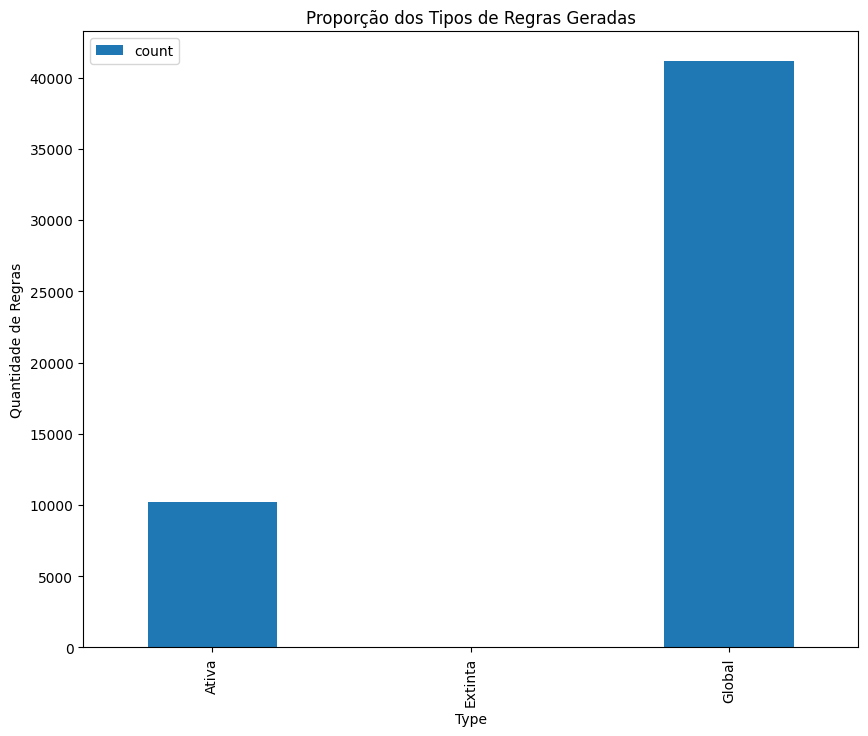

In [121]:
aux = df_rules.groupby(['Type']).size().reset_index(name = 'count')
aux

%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 8]

ax = aux.plot.bar(x='Type', y='count')
ax.set_ylabel('Quantidade de Regras')
ax.set_title('Proporção dos Tipos de Regras Geradas')
plt.savefig('./graphs/rules_types.png')

* Avaliando Suporte:

c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


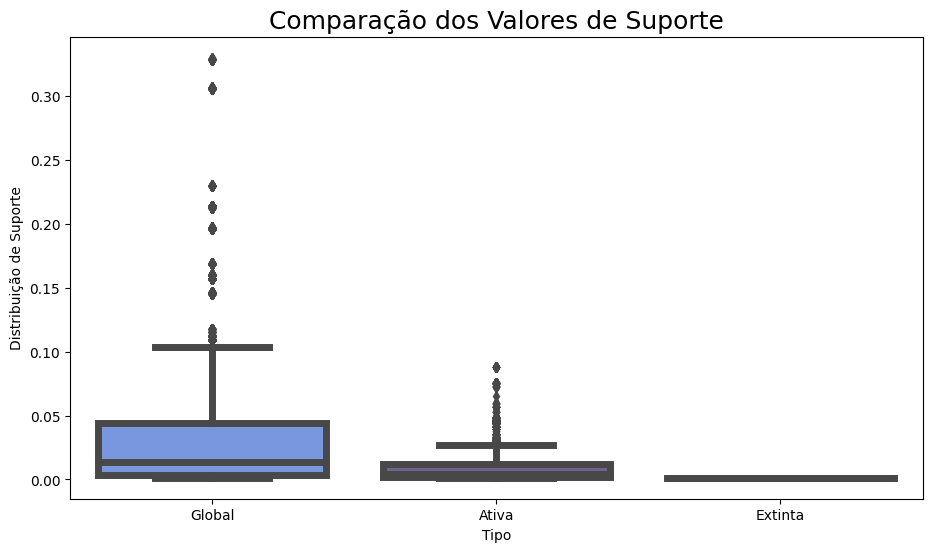

In [106]:
plt.figure(figsize =(11, 6))

colors = ['#6890F0', '#705898', '#98D8D8']

ax = sns.boxplot( x = "Type", y ="Support", data = df_rules, linewidth=5, palette=colors)

plt.title("Comparação dos Valores de Suporte", loc="center", fontsize=18)
plt.xlabel("Tipo")
plt.ylabel("Distribuição de Suporte")

plt.savefig('./graphs/support_boxplot.png')
plt.show()

* Avaliando Confiança:

c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


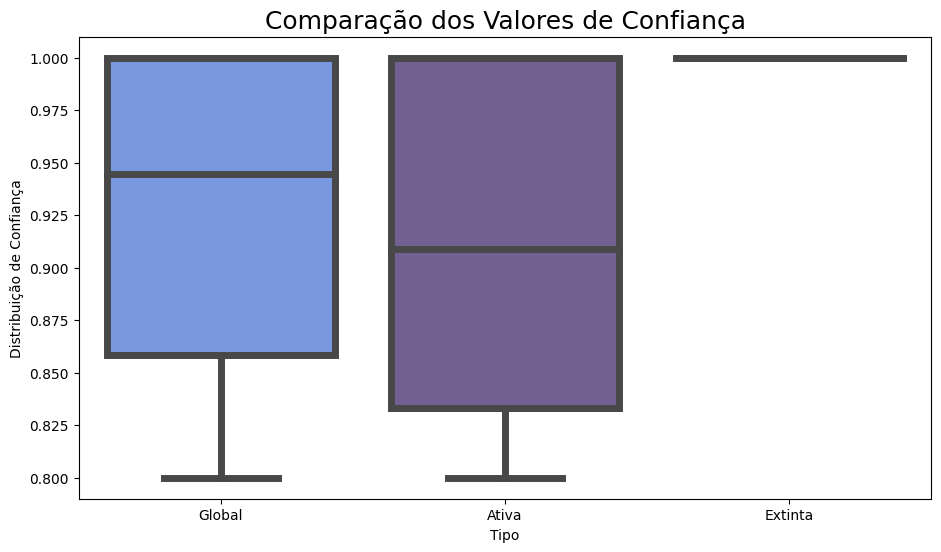

In [107]:
plt.figure(figsize =(11, 6))

colors = ['#6890F0', '#705898', '#98D8D8']

ax = sns.boxplot( x = "Type", y ="Confidence", data = df_rules, linewidth=5, palette=colors)

plt.title("Comparação dos Valores de Confiança", loc="center", fontsize=18)
plt.xlabel("Tipo")
plt.ylabel("Distribuição de Confiança")

plt.savefig('./graphs/confidence_boxplot.png')
plt.show()

* Avaliando Lift:

c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


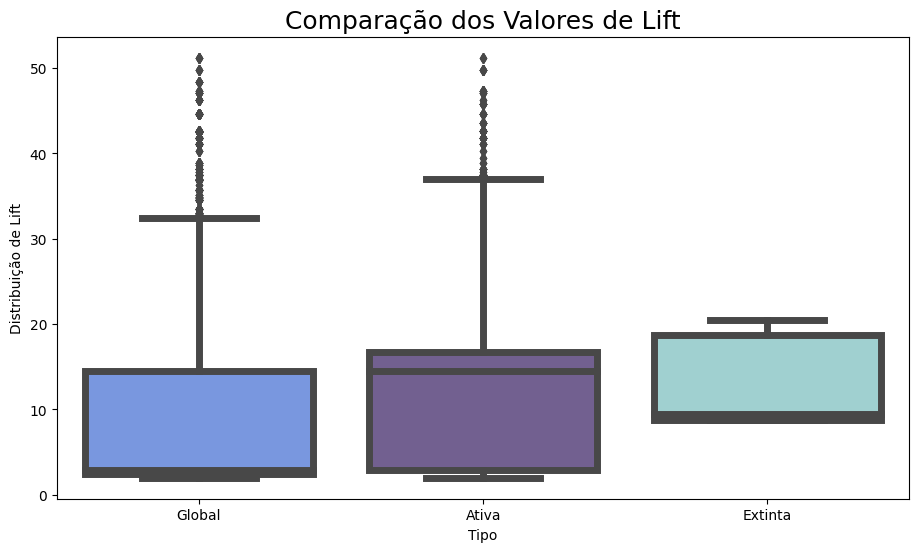

In [108]:
plt.figure(figsize =(11, 6))

colors = ['#6890F0', '#705898', '#98D8D8']

ax = sns.boxplot( x = "Type", y ="Lift", data = df_rules, linewidth=5, palette=colors)

plt.title("Comparação dos Valores de Lift", loc="center", fontsize=18)
plt.xlabel("Tipo")
plt.ylabel("Distribuição de Lift")

plt.savefig('./graphs/lift_boxplot.png')
plt.show()